# Storytelling Data Visualization on Exchange Rates

## Introduction
The goal of this project is to explore the evolution of the exchange rates between the following currencies:

EUR-USD,
EUR-RUB (the Russian rouble).
For each pair of currencies, we'll identify the main political and/or economical factors that influenced exchange rate dynamics during the coronavirus pandemic in 2020.

The [dataset](https://www.kaggle.com/lsind18/euro-exchange-daily-rates-19992020) we'll use describes the euro daily exchange rates for different currencies from 1999 till 2021. The data was gathered by Daria Chemkaeva from the European Central Bank data source.

## Opening and Exploring data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
exchange_rates = pd.read_csv('/Users/sahithi/Documents/Python Projects/Storytelling Data Visualization on Exchange Rates/euro-daily-hist_1999_2020.csv')
pd.set_option('max_columns', exchange_rates.shape[1])
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],[Estonian kroon ],[UK pound sterling ],[Greek drachma ],[Hong Kong dollar ],[Croatian kuna ],[Hungarian forint ],[Indonesian rupiah ],[Israeli shekel ],[Indian rupee ],[Iceland krona ],[Japanese yen ],[Korean won ],[Lithuanian litas ],[Latvian lats ],[Maltese lira ],[Mexican peso ],[Malaysian ringgit ],[Norwegian krone ],[New Zealand dollar ],[Philippine peso ],[Polish zloty ],[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-02-12,1.5666,1.9558,6.5302,1.5418,1.0803,7.8207,NaN,25.753,7.4361,NaN,0.87753,NaN,9.3868,7.5710,358.87,16936.37,3.9377,87.8770,155.8,127.15,1337.98,NaN,NaN,NaN,24.2515,4.8947,10.2850,1.6840,58.181,4.4999,4.8746,89.8055,10.0818,1.6066,NaN,NaN,36.2150,8.5010,1.2108,17.7362
1,2021-02-11,1.5638,1.9558,6.4936,1.5384,1.0802,7.8448,NaN,25.772,7.4380,NaN,0.87755,NaN,9.4171,7.5688,357.18,16963.10,3.9531,88.4040,155.8,127.12,1339.97,NaN,NaN,NaN,24.2037,4.9104,10.2595,1.6772,58.343,4.4975,4.8745,89.3792,10.0868,1.6080,NaN,NaN,36.2710,8.5254,1.2147,17.7533
2,2021-02-10,1.5682,1.9558,6.5641,1.5394,1.0805,7.8235,NaN,25.835,7.4373,NaN,0.87650,NaN,9.4014,7.5645,357.53,16956.58,3.9441,88.3185,155.2,127.04,1340.67,NaN,NaN,NaN,24.3776,4.9042,10.2280,1.6803,58.269,4.4819,4.8752,89.5116,10.0800,1.6080,NaN,NaN,36.2660,8.5503,1.2127,17.8301
3,2021-02-09,1.5681,1.9558,6.5530,1.5414,1.0817,7.7894,NaN,25.738,7.4369,NaN,0.87828,NaN,9.3827,7.5670,358.88,16929.80,3.9401,88.2765,154.1,126.58,1347.42,NaN,NaN,NaN,24.3205,4.8997,10.2588,1.6741,58.142,4.4761,4.8753,89.6164,10.1058,1.6074,NaN,NaN,36.2390,8.5883,1.2104,17.8953
4,2021-02-08,1.5693,1.9558,6.4955,1.5363,1.0842,7.7618,NaN,25.739,7.4365,NaN,0.87833,NaN,9.3219,7.5583,358.33,16876.31,3.9487,87.7240,154.7,126.97,1347.77,NaN,NaN,NaN,24.3050,4.8888,10.2725,1.6740,57.843,4.4824,4.8748,89.4049,10.1148,1.6067,NaN,NaN,36.0980,8.5308,1.2025,17.9701


In [2]:
exchange_rates.tail()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
5719,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
5720,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
5721,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
5722,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
5723,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358


In [4]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5724 entries, 0 to 5723
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5724 non-null   object 
 1   [Australian dollar ]      5724 non-null   object 
 2   [Bulgarian lev ]          5322 non-null   object 
 3   [Brazilian real ]         5456 non-null   object 
 4   [Canadian dollar ]        5724 non-null   object 
 5   [Swiss franc ]            5724 non-null   object 
 6   [Chinese yuan renminbi ]  5456 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5724 non-null   object 
 9   [Danish krone ]           5724 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5724 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5724 non-null   object 
 14  [Croatia

In [4]:
print(round(exchange_rates.isnull().sum()*100/len(exchange_rates)))

Period\Unit:                 0.0
[Australian dollar ]         0.0
[Bulgarian lev ]             7.0
[Brazilian real ]            5.0
[Canadian dollar ]           0.0
[Swiss franc ]               0.0
[Chinese yuan renminbi ]     5.0
[Cypriot pound ]            59.0
[Czech koruna ]              0.0
[Danish krone ]              0.0
[Estonian kroon ]           45.0
[UK pound sterling ]         0.0
[Greek drachma ]            91.0
[Hong Kong dollar ]          0.0
[Croatian kuna ]             5.0
[Hungarian forint ]          0.0
[Indonesian rupiah ]         0.0
[Israeli shekel ]            5.0
[Indian rupee ]              5.0
[Iceland krona ]            42.0
[Japanese yen ]              0.0
[Korean won ]                0.0
[Lithuanian litas ]         27.0
[Latvian lats ]             32.0
[Maltese lira ]             59.0
[Mexican peso ]              0.0
[Malaysian ringgit ]         0.0
[Norwegian krone ]           0.0
[New Zealand dollar ]        0.0
[Philippine peso ]           0.0
[Polish zl

we can make the following observations:

There are 5,699 rows and 41 columns in the dataset. Each entry represents a working day from 4.01.1999 till 8.01.2021 inclusive. Each column, apart from the first one, represents a currency to euro rate, for 40 different currencies.

Many columns don't have missing values at all (or, more precisely, they don't have NaN values), while some have a high percentage of them: 91% for Greek drachma, 63% for Slovenian tolar.

3 of 41 columns are of float type, all the others – object type. We should consider converting the first column with the dates into datetime and the others, representing numerical information, into float.

## Data Cleaning
For the scope of our analysis, we're interested only in the columns Period\\Unit:, [US dollar ], and [Russian rouble ]. Hence, we'll focus on cleaning only them:

In [5]:
# Renaming the columns
exchange_rates.rename(columns={'Period\\Unit:': 'Time',
                               '[US dollar ]': 'US_dollar',
                               '[Russian rouble ]': 'Russian_rouble'},
                      inplace=True)

exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

# Isolating the necessary columns
euro_to_dollar = exchange_rates[['Time', 'US_dollar']]
euro_to_rouble = exchange_rates[['Time', 'Russian_rouble']]

# Checking the EUR-USD and EUR-RUB exchange rate values
print(euro_to_dollar['US_dollar'].value_counts())
print(euro_to_rouble['Russian_rouble'].value_counts())

-         62
1.2276     9
1.1215     8
1.1305     7
1.0888     6
          ..
1.1446     1
0.8913     1
1.3018     1
1.0663     1
1.0124     1
Name: US_dollar, Length: 3535, dtype: int64
-          62
35.2250     4
40.6500     4
43.9800     4
40.5950     4
           ..
36.7170     1
35.5020     1
33.9180     1
34.2380     1
25.7812     1
Name: Russian_rouble, Length: 5438, dtype: int64


In both new dataframes, we have a wrong value "-" for the corresponding exchange rates, which resulted in these columns to be of a string data type. Practically, those are missing values that should be dropped. Then, we'll convert the columns to a float data type.

In [6]:
# Keeping only the valid values in both dataframes
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar']!='-']
euro_to_rouble = euro_to_rouble[euro_to_rouble['Russian_rouble']!='-']

# Converting exchange rate columns to float
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)
euro_to_rouble['Russian_rouble'] = euro_to_rouble['Russian_rouble'].astype(float)

Now that we created and cleaned the dataframes for both currencies in interest, let's focus on each of them at turns.

## EUR-USD Exchange Rate Evolution
### General trend
Let's start with creating a line plot to visualize the evolution of the EUR-USD exchange rate for the whole period of time. Since we are interested in a general trend of this evolution, we'd rather see a smooth line of long-term upward and downward changes, without small wiggles due to the daily variation in the exchange rate. For these purposes, we can use the concept of the rolling mean, aka the moving average. The principle behind this is that if we apply a larger rolling window rather than one day, we'll get a smoother line, with reduced noise. The larger the rolling window, the smoother the line.

In our case, a reasonable rolling window is 30 days, i.e. 1 month. This approach will allow increasing the data-ink ratio without losing any important information, and, as a result, will facilitate focusing on long-term trends rather than the noise.

In [7]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()

Now, we'll plot 2 graphs: EUR-USD exchange rate evolution with and without smoothing, to see the difference:

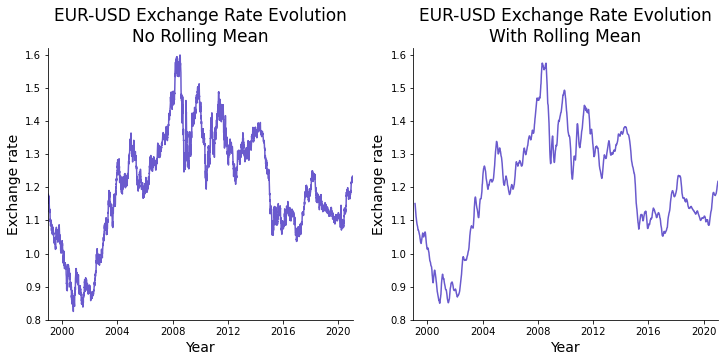

In [8]:
columns = ['US_dollar', 'rolling_mean']
titles = ['EUR-USD Exchange Rate Evolution\nNo Rolling Mean', 'EUR-USD Exchange Rate Evolution\nWith Rolling Mean']

def create_line_plot(df, title, xlabel='Month', column='rolling_mean',
                     title_font=25, label_font=20, tick_font=14,
                     x_min='1999-01-01', x_max='2021-01-08', y_min=None, y_max=None):
    plt.plot(df['Time'], df[column], color='slateblue')
    plt.title(title, fontsize=title_font)
    plt.xlabel(xlabel, fontsize=label_font)
    plt.ylabel('Exchange rate', fontsize=label_font)
    plt.xticks(fontsize=tick_font)
    plt.yticks(fontsize=tick_font)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    sns.despine()
    
plt.figure(figsize=(12,5))
for i in range(1,3):
    plt.subplot(1, 2, i)
    create_line_plot(df=euro_to_dollar, column=columns[i-1], title=titles[i-1], xlabel='Year',
                     title_font=17, label_font=14, tick_font=None,
                     y_min=0.8, y_max=1.62)

As we expected, the second graph is much easier to interpret. We can distinguish various features on it: initial decrease lasted up until 2003 and followed by a rapid increase. After a series of going up and down, we observe a clear sharp drop at the end of 2015, followed by some fluctuations at lower levels.

Obviously, over the last 22 years, a lot of events happened in the USA both at national and international scales that influenced the EUR-USD exchange rate variation. The graph above can tell us numerous stories, but the one we want to visualize and explore in this project is how the EUR-USD rate has changed during the coronavirus pandemic.

## Developing the Storytelling Idea
Let's start with reproducing the graph above, for now without any particular adjustments, zooming in only the period of interest (1.12.2019-1.01.2021) and limiting the y-axis to discern the changes in more detail:

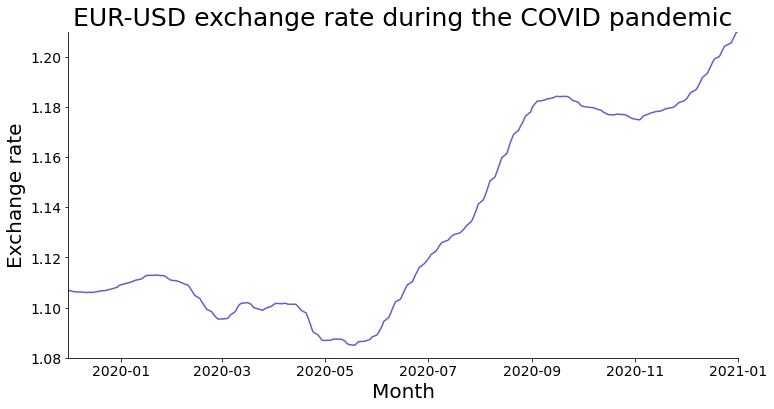

In [9]:
plt.figure(figsize=(12,6))
create_line_plot(df=euro_to_dollar, title='EUR-USD exchange rate during the COVID pandemic',
                 x_min='2019-12-01', x_max='2021-01-01', y_min=1.08, y_max=1.21)

In 2020, after some fluctuations, the EUR-USD rate was steadily increasing from the end of May, with a slight decrease and plateau at the end of September-beginning of November.

In [25]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()
euro_to_dollar

,Time,US_dollar,rolling_mean
0,1999-01-04,1.1789,NaN
1,1999-01-05,1.1790,NaN
2,1999-01-06,1.1743,NaN
3,1999-01-07,1.1632,NaN
4,1999-01-08,1.1659,NaN
...,...,...,...
5719,2021-02-08,1.2025,1.215320
5720,2021-02-09,1.2104,1.214937
5721,2021-02-10,1.2127,1.214497
5722,2021-02-11,1.2147,1.214050


## Coming up with an Idea
Our goal is to create a narrative data visualization using the data we have. To create a story, we must organize our data into a series of events that show changes.

Here are a few story ideas for our data:

- We show how the euro-dollar rate has changed during the coronavirus pandemic. We can show the 2020 data and the 2016-2019 data as a baseline. We can use a line plot.
- We show how the euro-dollar rate changed during the 2007-2008 financial crisis. We can also show the data for 2006 and 2009 for comparison. We can use a line plot.
- We show comparatively how the euro-dollar rate changed under the last three US presidents (George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021)). We can use a line plot.

### Impact of the Coronavirus Pandemic on the US Dollar
Next, we will show how the euro-dollar rate has changed during the coronavirus pandemic. We know that the pandemic arrived in the United States in January 2020; therefore, we will show the 2020 data (through January 2021) and compare it to the 2017-2019 data as a baseline.

In [10]:
before_pandemic = euro_to_dollar.copy()[(euro_to_dollar['Time'].dt.year >= 2017) & (euro_to_dollar['Time'].dt.year <= 2019)]
pandemic_2020 = euro_to_dollar.copy()[euro_to_dollar['Time'].dt.year >= 2020]

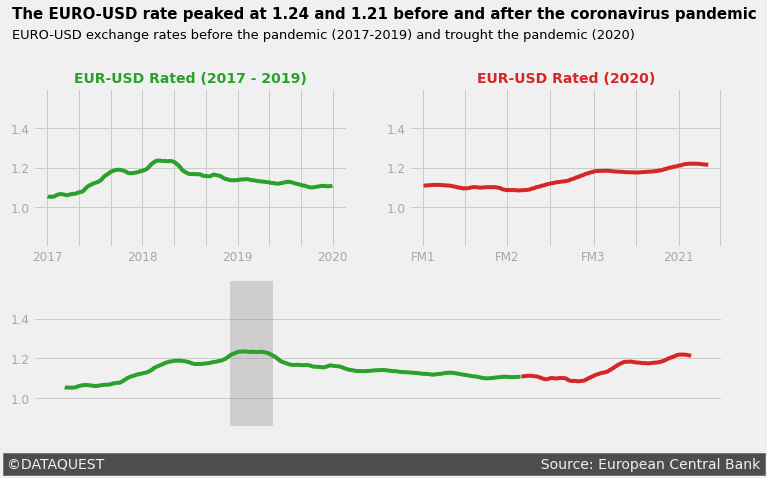

In [11]:
### Adding the FiveThirtyEight style
import matplotlib.style as style
style.use('fivethirtyeight')

### Adding the subplots
fig = plt.figure(figsize=(11, 6))
fig.tight_layout()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,1,2)
axes = [ax1, ax2, ax3]

### Changes to all the subplots
for ax in axes:
    ax.set_ylim(0.8, 1.6)
    ax.set_yticks([1.0, 1.2, 1.4])
    ax.set_yticklabels(['1.0', '1.2','1.4'], fontsize=12, alpha=0.3)

### Ax1: Before pandemic 2017-2019
ax1.plot(before_pandemic['Time'], before_pandemic['rolling_mean'], color='#2ca02c')
ax1.set_xticklabels(['2017', '', '', '2018', '', '', '2019', '', '', '2020'], fontsize=12, alpha=0.3)
ax1.set_title('EUR-USD Rated (2017 - 2019)', fontsize=14, weight='bold', color='#2ca02c')
   
### Ax2: coronavirus pandemic 2020
ax2.plot(pandemic_2020['Time'], pandemic_2020['rolling_mean'], color='#d62728')
ax2.set_xticklabels(['FM1', '', 'FM2', '', 'FM3', '', '2021'], fontsize=12, alpha=0.3)
ax2.set_title('EUR-USD Rated (2020)', fontsize=14, weight='bold', color='#d62728')

### Ax3: Merge both times
ax3.plot(before_pandemic['Time'], before_pandemic['rolling_mean'], color='#2ca02c')
ax3.plot(pandemic_2020['Time'], pandemic_2020['rolling_mean'], color='#d62728')
ax3.axvspan(xmin=17565, xmax=17665, ymin=0.08, alpha=0.3, color='grey') # Highlihting the peak before coronavirus pandemic
ax3.set_xticks([])

### Adding a title and a subtitle
ax1.text(17030, 1.95, 'The EURO-USD rate peaked at 1.24 and 1.21 before and after the coronavirus pandemic', fontsize=15, weight='bold')
ax1.text(17030, 1.85, 'EURO-USD exchange rates before the pandemic (2017-2019) and trought the pandemic (2020)', fontsize=13)

### Adding a signature
ax3.text(17030, 0.65, '©DATAQUEST' + ' ' * 97 + 'Source: European Central Bank', color='#f0f0f0', backgroundcolor='#4d4d4d', size=14)

plt.show()

## Conclusion
In the chart prior to the coronavirus pandemic, we can see that the Euro-USD exchange rate fluctuates upward since the second four-mounth of 2017, reaching its highest peak (1.24 approximately) in the first four-mounth of 2018.
After that time period, we see a uniform decline until the end of the first four-mounth of 2020. From there, we appreciate a steady upward movement; even until January 2021.
Overall, euro-dollar exchange rates increased mainly in 2020, which may be due to the recession caused by the coronavirus pandemic.